## Ignore Warnings

In [1]:
import gensim

In [2]:
!wget nlp.stanford.edu/data/glove.6B.zip

--2024-04-23 12:05:07--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-04-23 12:05:08--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-04-23 12:05:08--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [3]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [4]:
from gensim.scripts.glove2word2vec import glove2word2vec

In [5]:
glove_input_file = 'glove.6B.300d.txt'

In [6]:
glove_output_file = 'word2vec.txt'

In [7]:
import warnings
warnings.filterwarnings("ignore")

## Reading Datasets

In [ ]:
import pandas as pd
edf=pd.read_csv("/content/extended_tweets.csv")
edf

In [8]:
import pandas as pd
sdf=pd.read_csv("/content/gender-classifier-DFE-791531.csv",encoding="latin")
sdf

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,815757572,True,golden,259,NaN,female,1.0000,yes,1.0,8/5/15 21:16,...,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",NaN,783,10/26/15 13:20,6.587400e+17,Verona ªÁ,NaN
20046,815757681,True,golden,248,NaN,male,1.0000,yes,1.0,8/15/12 21:17,...,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,NaN,13523,10/26/15 12:40,6.587300e+17,"Kansas City, MO",NaN
20047,815757830,True,golden,264,NaN,male,1.0000,yes,1.0,9/3/12 1:17,...,https://pbs.twimg.com/profile_images/655473271...,0,C0DEED,You can miss people and still never want to se...,NaN,26419,10/26/15 13:20,6.587400e+17,Lagos Nigeria,NaN
20048,815757921,True,golden,250,NaN,female,0.8489,yes,1.0,11/6/12 23:46,...,https://pbs.twimg.com/profile_images/657716093...,0,0,@bitemyapp i had noticed your tendency to pee ...,NaN,56073,10/26/15 12:40,6.587300e+17,Texas Hill Country,NaN


In [ ]:
data=edf[["_unit_id","created","name","gender_x","text","description"]]
data

In [9]:
data1=sdf[["_unit_id","created","name","gender","text","description"]]
data1

,_unit_id,created,name,gender,text,description
0,815719226,12/5/13 1:48,sheezy0,male,Robbie E Responds To Critics After Win Against...,i sing my own rhythm.
1,815719227,10/1/12 13:51,DavdBurnett,male,ÛÏIt felt like they were my friends and I was...,I'm the author of novels filled with family dr...
2,815719228,11/28/14 11:30,lwtprettylaugh,male,i absolutely adore when louis starts the songs...,louis whining and squealing and all
3,815719229,6/11/09 22:39,douggarland,male,Hi @JordanSpieth - Looking at the url - do you...,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe..."
4,815719230,4/16/14 13:23,WilfordGemma,female,Watching Neighbours on Sky+ catching up with t...,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...
...,...,...,...,...,...,...
20045,815757572,8/5/15 21:16,capuletrosa,female,"@lookupondeath ...Fine, and I'll drink tea too...",(rp)
20046,815757681,8/15/12 21:17,BenNight41,male,Greg Hardy you a good player and all but don't...,"Whatever you like, it's not a problem at all. ..."
20047,815757830,9/3/12 1:17,realuzzyfluxz,male,You can miss people and still never want to se...,#TeamBarcelona ..You look lost so you should f...
20048,815757921,11/6/12 23:46,argumatronic,female,@bitemyapp i had noticed your tendency to pee ...,Anti-statist; I homeschool my kids. Aspiring t...


## Counting Gender Values

In [ ]:
data["gender_x"].value_counts()

male       159710
female     136244
brand          83
unknown        71
Name: gender_x, dtype: int64

In [10]:
data1["gender"].value_counts()

gender
female     6700
male       6194
brand      5942
unknown    1117
Name: count, dtype: int64

In [11]:
data.dropna(subset=["gender_x"], inplace=True)
data1.dropna(subset=["gender"], inplace=True)

In [12]:
data.drop(data.loc[data["gender_x"]=="unknown"].index, inplace=True)
data.drop(data.loc[data["gender_x"]=="brand"].index, inplace=True)

data1.drop(data1.loc[data1["gender"]=="unknown"].index, inplace=True)
data1.drop(data1.loc[data1["gender"]=="brand"].index, inplace=True)

## Gender Count after cleaning

In [ ]:
data["gender_x"].value_counts()

male      159710
female    136244
Name: gender_x, dtype: int64

In [13]:
data1["gender"].value_counts()

gender
female    6700
male      6194
Name: count, dtype: int64

In [ ]:
data.dropna(subset=["description"], inplace=True)

In [14]:
data1.dropna(subset=["description"], inplace=True)

In [ ]:
data

,_unit_id,created,name,gender_x,text,description
0,815719227,10/1/12 13:51,DavdBurnett,male,ÛÏIt felt like they were my friends and I was...,I'm the author of novels filled with family dr...
1,815719227,10/1/12 13:51,DavdBurnett,male,ÛÏIt felt like they were my friends and I was...,I'm the author of novels filled with family dr...
2,815719227,10/1/12 13:51,DavdBurnett,male,ÛÏIt felt like they were my friends and I was...,I'm the author of novels filled with family dr...
3,815719227,10/1/12 13:51,DavdBurnett,male,ÛÏIt felt like they were my friends and I was...,I'm the author of novels filled with family dr...
4,815719227,10/1/12 13:51,DavdBurnett,male,ÛÏIt felt like they were my friends and I was...,I'm the author of novels filled with family dr...
...,...,...,...,...,...,...
296103,815739564,10/30/10 4:47,teambrice,female,I've been thinking a lot about blue eyeliner l...,Slicker than your average. Views are my own.
296104,815739565,7/13/15 15:18,oooohselena,female,Omg I am sitting here crying while making this...,instagram: @Selenaa_Reyes - snapchat: @oooohse...
296105,815739569,10/21/12 16:50,ZeTheGreat,male,"I'm off tomorrow, and so is my barber. Pissed",Don't ask me for no fuckin favors!
296106,815739579,5/10/15 8:39,sava_jo_19,female,"When you're driving home from school and ""perf...",OTRA Chicago 8/23/15 -we love you boys with al...


In [15]:
data1

,_unit_id,created,name,gender,text,description
0,815719226,12/5/13 1:48,sheezy0,male,Robbie E Responds To Critics After Win Against...,i sing my own rhythm.
1,815719227,10/1/12 13:51,DavdBurnett,male,ÛÏIt felt like they were my friends and I was...,I'm the author of novels filled with family dr...
2,815719228,11/28/14 11:30,lwtprettylaugh,male,i absolutely adore when louis starts the songs...,louis whining and squealing and all
3,815719229,6/11/09 22:39,douggarland,male,Hi @JordanSpieth - Looking at the url - do you...,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe..."
4,815719230,4/16/14 13:23,WilfordGemma,female,Watching Neighbours on Sky+ catching up with t...,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...
...,...,...,...,...,...,...
20045,815757572,8/5/15 21:16,capuletrosa,female,"@lookupondeath ...Fine, and I'll drink tea too...",(rp)
20046,815757681,8/15/12 21:17,BenNight41,male,Greg Hardy you a good player and all but don't...,"Whatever you like, it's not a problem at all. ..."
20047,815757830,9/3/12 1:17,realuzzyfluxz,male,You can miss people and still never want to se...,#TeamBarcelona ..You look lost so you should f...
20048,815757921,11/6/12 23:46,argumatronic,female,@bitemyapp i had noticed your tendency to pee ...,Anti-statist; I homeschool my kids. Aspiring t...


In [ ]:
data.reset_index(inplace=True)
data

,index,_unit_id,created,name,gender_x,text,description
0,0,815719227,10/1/12 13:51,DavdBurnett,male,ÛÏIt felt like they were my friends and I was...,I'm the author of novels filled with family dr...
1,1,815719227,10/1/12 13:51,DavdBurnett,male,ÛÏIt felt like they were my friends and I was...,I'm the author of novels filled with family dr...
2,2,815719227,10/1/12 13:51,DavdBurnett,male,ÛÏIt felt like they were my friends and I was...,I'm the author of novels filled with family dr...
3,3,815719227,10/1/12 13:51,DavdBurnett,male,ÛÏIt felt like they were my friends and I was...,I'm the author of novels filled with family dr...
4,4,815719227,10/1/12 13:51,DavdBurnett,male,ÛÏIt felt like they were my friends and I was...,I'm the author of novels filled with family dr...
...,...,...,...,...,...,...,...
263792,296103,815739564,10/30/10 4:47,teambrice,female,I've been thinking a lot about blue eyeliner l...,Slicker than your average. Views are my own.
263793,296104,815739565,7/13/15 15:18,oooohselena,female,Omg I am sitting here crying while making this...,instagram: @Selenaa_Reyes - snapchat: @oooohse...
263794,296105,815739569,10/21/12 16:50,ZeTheGreat,male,"I'm off tomorrow, and so is my barber. Pissed",Don't ask me for no fuckin favors!
263795,296106,815739579,5/10/15 8:39,sava_jo_19,female,"When you're driving home from school and ""perf...",OTRA Chicago 8/23/15 -we love you boys with al...


In [16]:
data1.reset_index(inplace=True)
data1

,index,_unit_id,created,name,gender,text,description
0,0,815719226,12/5/13 1:48,sheezy0,male,Robbie E Responds To Critics After Win Against...,i sing my own rhythm.
1,1,815719227,10/1/12 13:51,DavdBurnett,male,ÛÏIt felt like they were my friends and I was...,I'm the author of novels filled with family dr...
2,2,815719228,11/28/14 11:30,lwtprettylaugh,male,i absolutely adore when louis starts the songs...,louis whining and squealing and all
3,3,815719229,6/11/09 22:39,douggarland,male,Hi @JordanSpieth - Looking at the url - do you...,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe..."
4,4,815719230,4/16/14 13:23,WilfordGemma,female,Watching Neighbours on Sky+ catching up with t...,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...
...,...,...,...,...,...,...,...
11189,20045,815757572,8/5/15 21:16,capuletrosa,female,"@lookupondeath ...Fine, and I'll drink tea too...",(rp)
11190,20046,815757681,8/15/12 21:17,BenNight41,male,Greg Hardy you a good player and all but don't...,"Whatever you like, it's not a problem at all. ..."
11191,20047,815757830,9/3/12 1:17,realuzzyfluxz,male,You can miss people and still never want to se...,#TeamBarcelona ..You look lost so you should f...
11192,20048,815757921,11/6/12 23:46,argumatronic,female,@bitemyapp i had noticed your tendency to pee ...,Anti-statist; I homeschool my kids. Aspiring t...


In [17]:
data["tweetdesc"]=data["text"]+" "+data["description"]
data1["tweetdesc"]=data1["text"]+" "+data1["description"]

## Preprocessing

In [18]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

# Define the preprocessing function
def preprocess_text(text):
    # 1. Convert text to lowercase
    text = text.lower()

    # 2. Remove special, non-ASCII characters
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)

    # 3. Remove stopwords using NLTK
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    text = ' '.join([word for word in word_tokens if word not in stop_words])

    # 4. Remove emoticons, retweets, favorites, hashtags, URLs, and usernames starting with '@'
    text = re.sub(r'@\w+\s?', '', text)  # Remove usernames starting with '@'
    text = re.sub(r'@(\w+)', '', text)
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'RT\s', '', text)  # Remove retweets
    text = re.sub(r'&\w+;', '', text)  # Remove HTML entities (if any)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # 5. Remove duplicates
    text = ' '.join(dict.fromkeys(text.split()))
    # 6. Tokenize using NLTK
    tokens = word_tokenize(text)

    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
data['ctext'] = data['text'].apply(preprocess_text)

In [19]:
data1['ctext'] = data1['text'].apply(preprocess_text)

In [ ]:
data['cdescription'] = data['description'].apply(preprocess_text)

In [20]:
data1['cdescription'] = data1['description'].apply(preprocess_text)

In [ ]:
data['ctweetdesc'] = data['tweetdesc'].apply(preprocess_text)

In [21]:
data1['ctweetdesc'] = data1['tweetdesc'].apply(preprocess_text)

In [ ]:
data["tweetdesc"][3]

"\x89ÛÏIt felt like they were my friends and I was living the story with them\x89Û\x9d https://t.co/arngE0YHNO #retired #IAN1 https://t.co/CIzCANPQFz I'm the author of novels filled with family drama and romance."

In [ ]:
data["ctweetdesc"][3]

'felt like friends living story tcoarngeyhno retired ian tcocizcanpqfz m author novels filled family drama romance'

## Converting gender values to numeric

In [ ]:
data['numgender'] = data['gender_x'].map({'male': 1,'female': 0})
data

,index,_unit_id,created,name,gender_x,text,description,tweetdesc,ctext,cdescription,ctweetdesc,numgender
0,0,815719227,10/1/12 13:51,DavdBurnett,male,ÛÏIt felt like they were my friends and I was...,I'm the author of novels filled with family dr...,ÛÏIt felt like they were my friends and I was...,felt like friends living story tcoarngeyhno re...,m author novels filled family drama romance,felt like friends living story tcoarngeyhno re...,1
1,1,815719227,10/1/12 13:51,DavdBurnett,male,ÛÏIt felt like they were my friends and I was...,I'm the author of novels filled with family dr...,ÛÏIt felt like they were my friends and I was...,felt like friends living story tcoarngeyhno re...,m author novels filled family drama romance,felt like friends living story tcoarngeyhno re...,1
2,2,815719227,10/1/12 13:51,DavdBurnett,male,ÛÏIt felt like they were my friends and I was...,I'm the author of novels filled with family dr...,ÛÏIt felt like they were my friends and I was...,felt like friends living story tcoarngeyhno re...,m author novels filled family drama romance,felt like friends living story tcoarngeyhno re...,1
3,3,815719227,10/1/12 13:51,DavdBurnett,male,ÛÏIt felt like they were my friends and I was...,I'm the author of novels filled with family dr...,ÛÏIt felt like they were my friends and I was...,felt like friends living story tcoarngeyhno re...,m author novels filled family drama romance,felt like friends living story tcoarngeyhno re...,1
4,4,815719227,10/1/12 13:51,DavdBurnett,male,ÛÏIt felt like they were my friends and I was...,I'm the author of novels filled with family dr...,ÛÏIt felt like they were my friends and I was...,felt like friends living story tcoarngeyhno re...,m author novels filled family drama romance,felt like friends living story tcoarngeyhno re...,1
...,...,...,...,...,...,...,...,...,...,...,...,...
263792,296103,815739564,10/30/10 4:47,teambrice,female,I've been thinking a lot about blue eyeliner l...,Slicker than your average. Views are my own.,I've been thinking a lot about blue eyeliner l...,ve thinking lot blue eyeliner lately mean,slicker average views,ve thinking lot blue eyeliner lately mean slic...,0
263793,296104,815739565,7/13/15 15:18,oooohselena,female,Omg I am sitting here crying while making this...,instagram: @Selenaa_Reyes - snapchat: @oooohse...,Omg I am sitting here crying while making this...,omg sitting crying making video little sister ...,instagram selenaareyes snapchat oooohselena fu...,omg sitting crying making video little sister ...,0
263794,296105,815739569,10/21/12 16:50,ZeTheGreat,male,"I'm off tomorrow, and so is my barber. Pissed",Don't ask me for no fuckin favors!,"I'm off tomorrow, and so is my barber. Pissed ...",m tomorrow barber pissed,nt ask fuckin favors,m tomorrow barber pissed nt ask fuckin favors,1
263795,296106,815739579,5/10/15 8:39,sava_jo_19,female,"When you're driving home from school and ""perf...",OTRA Chicago 8/23/15 -we love you boys with al...,"When you're driving home from school and ""perf...",re driving home school perfect comes radio alm...,otra chicago we love boys hearts m d sos famil...,re driving home school perfect comes radio alm...,0


In [22]:
data1['numgender'] = data1['gender'].map({'male': 1,'female': 0})
data1

,index,_unit_id,created,name,gender,text,description,tweetdesc,ctext,cdescription,ctweetdesc,numgender
0,0,815719226,12/5/13 1:48,sheezy0,male,Robbie E Responds To Critics After Win Against...,i sing my own rhythm.,Robbie E Responds To Critics After Win Against...,robbie e responds critics win eddie edwards wo...,sing rhythm,robbie e responds critics win eddie edwards wo...,1
1,1,815719227,10/1/12 13:51,DavdBurnett,male,ÛÏIt felt like they were my friends and I was...,I'm the author of novels filled with family dr...,ÛÏIt felt like they were my friends and I was...,felt like friends living story tcoarngeyhno re...,m author novels filled family drama romance,felt like friends living story tcoarngeyhno re...,1
2,2,815719228,11/28/14 11:30,lwtprettylaugh,male,i absolutely adore when louis starts the songs...,louis whining and squealing and all,i absolutely adore when louis starts the songs...,absolutely adore louis starts songs hits hard ...,louis whining squealing,absolutely adore louis starts songs hits hard ...,1
3,3,815719229,6/11/09 22:39,douggarland,male,Hi @JordanSpieth - Looking at the url - do you...,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",Hi @JordanSpieth - Looking at the url - do you...,hi jordanspieth looking url use ifttt nt typic...,mobile guy ers shazam google kleiner perkins y...,hi jordanspieth looking url use ifttt nt typic...,1
4,4,815719230,4/16/14 13:23,WilfordGemma,female,Watching Neighbours on Sky+ catching up with t...,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,Watching Neighbours on Sky+ catching up with t...,watching neighbours sky catching neighbs xxx,ricky wilson best frontmankaiser chiefs band x...,watching neighbours sky catching neighbs xxx r...,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11189,20045,815757572,8/5/15 21:16,capuletrosa,female,"@lookupondeath ...Fine, and I'll drink tea too...",(rp),"@lookupondeath ...Fine, and I'll drink tea too...",lookupondeath fine ll drink tea love,rp,lookupondeath fine ll drink tea love rp,0
11190,20046,815757681,8/15/12 21:17,BenNight41,male,Greg Hardy you a good player and all but don't...,"Whatever you like, it's not a problem at all. ...",Greg Hardy you a good player and all but don't...,greg hardy good player nt get face dez bryant ...,whatever like s problem chargernation foreverr...,greg hardy good player nt get face dez bryant ...,1
11191,20047,815757830,9/3/12 1:17,realuzzyfluxz,male,You can miss people and still never want to se...,#TeamBarcelona ..You look lost so you should f...,You can miss people and still never want to se...,miss people still never want see,teambarcelona look lost follow heart bring bra...,miss people still never want see teambarcelona...,1
11192,20048,815757921,11/6/12 23:46,argumatronic,female,@bitemyapp i had noticed your tendency to pee ...,Anti-statist; I homeschool my kids. Aspiring t...,@bitemyapp i had noticed your tendency to pee ...,bitemyapp noticed tendency pee carpet nt want ...,antistatist homeschool kids aspiring thoughtle...,bitemyapp noticed tendency pee carpet nt want ...,0


# **GLOVE**

In [23]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(data.ctext, data.numgender, test_size=0.35,random_state=42 )
X_train2, X_test2, y_train2, y_test2 = train_test_split(data.ctweetdesc, data.numgender, test_size=0.35,random_state=42 )
X_train3, X_test3, y_train3, y_test3 = train_test_split(data.cdescription, data.numgender, test_size=0.35,random_state=42 )

X_traina, X_testa, y_traina, y_testa = train_test_split(data1.ctext, data1.numgender, test_size=0.35 )
X_trainb, X_testb, y_trainb, y_testb = train_test_split(data1.ctweetdesc, data1.numgender, test_size=0.35)
X_trainc, X_testc, y_trainc, y_testc = train_test_split(data1.cdescription, data1.numgender, test_size=0.35 )

In [24]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors
glove_input_file = 'glove.6B.300d.txt'
glove_output_file = 'word2vec.txt'
glove2word2vec(glove_input_file,glove_output_file)

(400000, 300)

In [25]:
model = KeyedVectors.load_word2vec_format(glove_output_file,binary=False)

In [26]:
def preprocess_text1(text):
    # Tokenize the text and get the average word vector for each text
    tokens = text.split()
    word_vectors_list = []
    for token in tokens:
        if token in model:
            word_vectors_list.append(model[token])
    if len(word_vectors_list) > 0:
        return np.mean(word_vectors_list, axis=0)
    else:
        return np.zeros(model.vector_size)

In [27]:
data1['ctext1'] = data1['ctext'].apply(preprocess_text1)

In [28]:
data1

,index,_unit_id,created,name,gender,text,description,tweetdesc,ctext,cdescription,ctweetdesc,numgender,ctext1
0,0,815719226,12/5/13 1:48,sheezy0,male,Robbie E Responds To Critics After Win Against...,i sing my own rhythm.,Robbie E Responds To Critics After Win Against...,robbie e responds critics win eddie edwards wo...,sing rhythm,robbie e responds critics win eddie edwards wo...,1,"[0.07622616, 0.31686586, -0.14160414, -0.08341..."
1,1,815719227,10/1/12 13:51,DavdBurnett,male,ÛÏIt felt like they were my friends and I was...,I'm the author of novels filled with family dr...,ÛÏIt felt like they were my friends and I was...,felt like friends living story tcoarngeyhno re...,m author novels filled family drama romance,felt like friends living story tcoarngeyhno re...,1,"[-0.02639143, 0.034471583, 0.050997432, -0.322..."
2,2,815719228,11/28/14 11:30,lwtprettylaugh,male,i absolutely adore when louis starts the songs...,louis whining and squealing and all,i absolutely adore when louis starts the songs...,absolutely adore louis starts songs hits hard ...,louis whining squealing,absolutely adore louis starts songs hits hard ...,1,"[0.01616778, 0.04647045, -0.13775872, 0.033542..."
3,3,815719229,6/11/09 22:39,douggarland,male,Hi @JordanSpieth - Looking at the url - do you...,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",Hi @JordanSpieth - Looking at the url - do you...,hi jordanspieth looking url use ifttt nt typic...,mobile guy ers shazam google kleiner perkins y...,hi jordanspieth looking url use ifttt nt typic...,1,"[-0.4403937, 0.14519137, 0.083168335, -0.21923..."
4,4,815719230,4/16/14 13:23,WilfordGemma,female,Watching Neighbours on Sky+ catching up with t...,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,Watching Neighbours on Sky+ catching up with t...,watching neighbours sky catching neighbs xxx,ricky wilson best frontmankaiser chiefs band x...,watching neighbours sky catching neighbs xxx r...,0,"[0.07278739, 0.078456, 0.25572425, -0.09731273..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11189,20045,815757572,8/5/15 21:16,capuletrosa,female,"@lookupondeath ...Fine, and I'll drink tea too...",(rp),"@lookupondeath ...Fine, and I'll drink tea too...",lookupondeath fine ll drink tea love,rp,lookupondeath fine ll drink tea love rp,0,"[-0.1807282, 0.18145859, -0.011971794, 0.04551..."
11190,20046,815757681,8/15/12 21:17,BenNight41,male,Greg Hardy you a good player and all but don't...,"Whatever you like, it's not a problem at all. ...",Greg Hardy you a good player and all but don't...,greg hardy good player nt get face dez bryant ...,whatever like s problem chargernation foreverr...,greg hardy good player nt get face dez bryant ...,1,"[-0.14727284, 0.10752723, -0.11198545, -0.1562..."
11191,20047,815757830,9/3/12 1:17,realuzzyfluxz,male,You can miss people and still never want to se...,#TeamBarcelona ..You look lost so you should f...,You can miss people and still never want to se...,miss people still never want see,teambarcelona look lost follow heart bring bra...,miss people still never want see teambarcelona...,1,"[-0.26291117, 0.12450734, -0.12550367, -0.1304..."
11192,20048,815757921,11/6/12 23:46,argumatronic,female,@bitemyapp i had noticed your tendency to pee ...,Anti-statist; I homeschool my kids. Aspiring t...,@bitemyapp i had noticed your tendency to pee ...,bitemyapp noticed tendency pee carpet nt want ...,antistatist homeschool kids aspiring thoughtle...,bitemyapp noticed tendency pee carpet nt want ...,0,"[-0.06932501, 0.18217167, 0.023730006, 0.07250..."


In [29]:
data1['ctweetdesc1'] = data1['ctweetdesc'].apply(preprocess_text1)

In [30]:
data1['cdescription1'] = data1['cdescription'].apply(preprocess_text1)

In [31]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    np.vstack(data1['ctext1']), data1['numgender'], test_size=0.35)

In [32]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    np.vstack(data1['ctweetdesc1']), data1['numgender'], test_size=0.35)

In [33]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    np.vstack(data1['cdescription1']), data1['numgender'], test_size=0.35)

# **NBC**

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train11 = scaler.fit_transform(X_train1)
X_test11 = scaler.transform(X_test1)

X_train22 = scaler.fit_transform(X_train2)
X_test22 = scaler.transform(X_test2)

X_train33 = scaler.fit_transform(X_train3)
X_test33 = scaler.transform(X_test3)

In [35]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train11, y_train1)
nb.fit(X_train22, y_train2)
nb.fit(X_train33, y_train3)

MultinomialNB()

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
y_pred1 = nb.predict(X_test11)
y_pred2 = nb.predict(X_test22)
y_pred3 = nb.predict(X_test33)

In [38]:
print(accuracy_score(y_test1, y_pred1))
print(accuracy_score(y_test2, y_pred2))
print(accuracy_score(y_test3, y_pred3))

0.5597243491577335
0.6463859111791731
0.588565594691169


## appending accuracy to list for plotting

In [39]:
l=[]
m=[]
n=[]

In [40]:
l.append(accuracy_score(y_test1, y_pred1) * 100)
m.append((accuracy_score(y_test2, y_pred2))* 100)
n.append(accuracy_score(y_test3, y_pred3) * 100)

In [41]:
print(classification_report(y_test1, y_pred1))
print(classification_report(y_test2, y_pred2))
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.57      0.57      0.57      2015
           1       0.55      0.55      0.55      1903

    accuracy                           0.56      3918
   macro avg       0.56      0.56      0.56      3918
weighted avg       0.56      0.56      0.56      3918

              precision    recall  f1-score   support

           0       0.59      0.86      0.70      2008
           1       0.71      0.36      0.48      1910

    accuracy                           0.62      3918
   macro avg       0.65      0.61      0.59      3918
weighted avg       0.65      0.62      0.59      3918

              precision    recall  f1-score   support

           0       0.56      0.87      0.68      1995
           1       0.69      0.29      0.41      1923

    accuracy                           0.59      3918
   macro avg       0.63      0.58      0.55      3918
weighted avg       0.63      0.59      0.55      3918



# **LR**

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
# instantiate the model (using the default parameters)
lr_model = LogisticRegression()

lr_model.fit(X_train1, y_train1)
lr_model.fit(X_train2, y_train2)
lr_model.fit(X_train3, y_train3)



LogisticRegression()

In [44]:
# Predict gender labels for test data
y_pred1 = lr_model.predict(X_test1)
y_pred2 = lr_model.predict(X_test2)
y_pred3 = lr_model.predict(X_test3)

In [46]:
print(accuracy_score(y_test1, y_pred1))
print(accuracy_score(y_test2, y_pred2))
print(accuracy_score(y_test3, y_pred3))

0.6137161817253701
0.6745788667687596
0.6506789178152118


In [47]:
l.append((accuracy_score(y_test1, y_pred1) )* 100)
m.append((accuracy_score(y_test2, y_pred2)) * 100)
n.append((accuracy_score(y_test3, y_pred3)) * 100)

In [48]:
print(classification_report(y_test1, y_pred1))
print(classification_report(y_test2, y_pred2))
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.59      0.62      0.61      2015
           1       0.58      0.54      0.56      1903

    accuracy                           0.58      3918
   macro avg       0.58      0.58      0.58      3918
weighted avg       0.58      0.58      0.58      3918

              precision    recall  f1-score   support

           0       0.68      0.70      0.69      2008
           1       0.67      0.65      0.66      1910

    accuracy                           0.67      3918
   macro avg       0.67      0.67      0.67      3918
weighted avg       0.67      0.67      0.67      3918

              precision    recall  f1-score   support

           0       0.64      0.64      0.64      1995
           1       0.63      0.62      0.62      1923

    accuracy                           0.63      3918
   macro avg       0.63      0.63      0.63      3918
weighted avg       0.63      0.63      0.63      3918



# **DT**

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
clf = DecisionTreeClassifier()

clf1 = clf.fit(X_train1,y_train1)
clf2 = clf.fit(X_train2,y_train2)
clf3 = clf.fit(X_train3,y_train3)

In [51]:
#Predict the response for test dataset
y_pred1 = clf.predict(X_test1)
y_pred2 = clf.predict(X_test2)
y_pred3 = clf.predict(X_test3)

In [53]:
print(accuracy_score(y_test1, y_pred1))
print(accuracy_score(y_test2, y_pred2))
print(accuracy_score(y_test3, y_pred3))

0.5462889229198571
0.5792138846350179
0.5607452782031649


In [54]:
l.append((accuracy_score(y_test1, y_pred1)) * 100)
m.append((accuracy_score(y_test2, y_pred2)) * 100)
n.append((accuracy_score(y_test3, y_pred3)) * 100)

In [55]:
print(classification_report(y_test1, y_pred1))
print(classification_report(y_test2, y_pred2))
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.54      0.53      0.53      2015
           1       0.51      0.52      0.52      1903

    accuracy                           0.53      3918
   macro avg       0.53      0.53      0.53      3918
weighted avg       0.53      0.53      0.53      3918

              precision    recall  f1-score   support

           0       0.58      0.51      0.54      2008
           1       0.54      0.61      0.57      1910

    accuracy                           0.56      3918
   macro avg       0.56      0.56      0.56      3918
weighted avg       0.56      0.56      0.56      3918

              precision    recall  f1-score   support

           0       0.57      0.58      0.57      1995
           1       0.55      0.54      0.55      1923

    accuracy                           0.56      3918
   macro avg       0.56      0.56      0.56      3918
weighted avg       0.56      0.56      0.56      3918



## RF

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf = RandomForestClassifier()

In [58]:
rf.fit(X_train1, y_train1)
rf.fit(X_train2, y_train2)
rf.fit(X_train3, y_train3)

RandomForestClassifier()

In [59]:
y_pred1 = rf.predict(X_test1)
y_pred2 = rf.predict(X_test2)
y_pred3 = rf.predict(X_test3)

In [61]:
print(accuracy_score(y_test1, y_pred1))
print(accuracy_score(y_test2, y_pred2))
print(accuracy_score(y_test3, y_pred3))

0.6247371107708015
0.7771311893823379
0.684461459928535


In [62]:
l.append((accuracy_score(y_test1, y_pred1)) * 100)
m.append((accuracy_score(y_test2, y_pred2)) * 100)
n.append((accuracy_score(y_test3, y_pred3)) * 100)

In [63]:
print(classification_report(y_test1, y_pred1))
print(classification_report(y_test2, y_pred2))
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.59      0.65      0.62      2015
           1       0.58      0.51      0.54      1903

    accuracy                           0.58      3918
   macro avg       0.58      0.58      0.58      3918
weighted avg       0.58      0.58      0.58      3918

              precision    recall  f1-score   support

           0       0.71      0.63      0.67      2008
           1       0.65      0.73      0.69      1910

    accuracy                           0.68      3918
   macro avg       0.68      0.68      0.68      3918
weighted avg       0.68      0.68      0.68      3918

              precision    recall  f1-score   support

           0       0.64      0.70      0.67      1995
           1       0.65      0.59      0.62      1923

    accuracy                           0.64      3918
   macro avg       0.65      0.64      0.64      3918
weighted avg       0.65      0.64      0.64      3918



## SVM

In [64]:
#Import svm model
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel

In [65]:
#Train the model using the training sets
clf.fit(X_train1, y_train1)
clf.fit(X_train2, y_train2)
clf.fit(X_train3, y_train3)

SVC(kernel='linear')

In [66]:
#Predict the response for test dataset
y_pred1 = clf.predict(X_test1)
y_pred2 = clf.predict(X_test2)
y_pred3 = clf.predict(X_test3)

In [69]:
print(accuracy_score(y_test1, y_pred1))
print(accuracy_score(y_test2, y_pred2))
print(accuracy_score(y_test3, y_pred3))

0.5835068912710567
0.7015160796324655
0.6478254211332313


In [70]:
l.append((accuracy_score(y_test1, y_pred1)) * 100)
m.append((accuracy_score(y_test2, y_pred2)) * 100)
n.append((accuracy_score(y_test3, y_pred3)) * 100)

In [71]:
print(classification_report(y_test1, y_pred1))
print(classification_report(y_test2, y_pred2))
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.58      0.62      0.60      2015
           1       0.57      0.53      0.55      1903

    accuracy                           0.57      3918
   macro avg       0.57      0.57      0.57      3918
weighted avg       0.57      0.57      0.57      3918

              precision    recall  f1-score   support

           0       0.67      0.70      0.69      2008
           1       0.67      0.64      0.66      1910

    accuracy                           0.67      3918
   macro avg       0.67      0.67      0.67      3918
weighted avg       0.67      0.67      0.67      3918

              precision    recall  f1-score   support

           0       0.64      0.66      0.65      1995
           1       0.64      0.61      0.62      1923

    accuracy                           0.64      3918
   macro avg       0.64      0.64      0.64      3918
weighted avg       0.64      0.64      0.64      3918



## Bagging

In [72]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [73]:
tree = DecisionTreeClassifier(random_state = 0)
bag = BaggingClassifier(
          base_estimator=tree,
          n_estimators=100,
          random_state=0)

In [74]:
bag.fit(X_train1, y_train1)
bag.fit(X_train2, y_train2)
bag.fit(X_train3, y_train3)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=0),
                  n_estimators=100, random_state=0)

In [75]:
y_pred1 = bag.predict(X_test1)
y_pred2 = bag.predict(X_test2)
y_pred3 = bag.predict(X_test3)

In [78]:
print(accuracy_score(y_test1, y_pred1))
print(accuracy_score(y_test2, y_pred2))
print(accuracy_score(y_test3, y_pred3))

0.5619754977029097
0.6371311893823379
0.611955079122001


In [79]:
l.append((accuracy_score(y_test1, y_pred1)) * 100)
m.append((accuracy_score(y_test2, y_pred2)) * 100)
n.append((accuracy_score(y_test3, y_pred3)) * 100)

In [80]:
print(classification_report(y_test1, y_pred1))
print(classification_report(y_test2, y_pred2))
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.58      0.64      0.60      2015
           1       0.57      0.50      0.53      1903

    accuracy                           0.57      3918
   macro avg       0.57      0.57      0.57      3918
weighted avg       0.57      0.57      0.57      3918

              precision    recall  f1-score   support

           0       0.71      0.62      0.66      2008
           1       0.65      0.74      0.69      1910

    accuracy                           0.68      3918
   macro avg       0.68      0.68      0.68      3918
weighted avg       0.68      0.68      0.68      3918

              precision    recall  f1-score   support

           0       0.63      0.69      0.66      1995
           1       0.64      0.57      0.61      1923

    accuracy                           0.63      3918
   macro avg       0.63      0.63      0.63      3918
weighted avg       0.63      0.63      0.63      3918



## VCH

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [82]:
estimator = []
estimator.append(('LR', LogisticRegression(solver ='lbfgs', multi_class ='multinomial', max_iter = 200)))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))

In [83]:
from sklearn.ensemble import VotingClassifier

In [84]:
vot_hard = VotingClassifier(estimators = estimator,voting='hard')
vot_hard.fit(X_train1, y_train1)
vot_hard.fit(X_train2, y_train2)
vot_hard.fit(X_train3, y_train3)

VotingClassifier(estimators=[('LR',
                              LogisticRegression(max_iter=200,
                                                 multi_class='multinomial')),
                             ('SVC', SVC(gamma='auto', probability=True)),
                             ('DTC', DecisionTreeClassifier())])

In [85]:
y_pred1 = vot_hard.predict(X_test1)
y_pred2 = vot_hard.predict(X_test2)
y_pred3 = vot_hard.predict(X_test3)

In [88]:
print(accuracy_score(y_test1, y_pred1))
print(accuracy_score(y_test2, y_pred2))
print(accuracy_score(y_test3, y_pred3))

0.5875446656457376
0.7061102603369066
0.6693568147013783


In [89]:
l.append(accuracy_score(y_test1, y_pred1) * 100)
m.append((accuracy_score(y_test2, y_pred2)) * 100)
n.append((accuracy_score(y_test3, y_pred3)) * 100)

In [90]:
print(classification_report(y_test1, y_pred1))
print(classification_report(y_test2, y_pred2))
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.59      0.68      0.63      2015
           1       0.59      0.49      0.54      1903

    accuracy                           0.59      3918
   macro avg       0.59      0.58      0.58      3918
weighted avg       0.59      0.59      0.58      3918

              precision    recall  f1-score   support

           0       0.67      0.71      0.69      2008
           1       0.68      0.64      0.66      1910

    accuracy                           0.68      3918
   macro avg       0.68      0.68      0.68      3918
weighted avg       0.68      0.68      0.68      3918

              precision    recall  f1-score   support

           0       0.64      0.68      0.66      1995
           1       0.64      0.60      0.62      1923

    accuracy                           0.64      3918
   macro avg       0.64      0.64      0.64      3918
weighted avg       0.64      0.64      0.64      3918



## VCS

In [91]:
from sklearn.ensemble import VotingClassifier

In [92]:
vot_soft = VotingClassifier(estimators = estimator,voting='soft')
vot_soft.fit(X_train1, y_train1)
vot_soft.fit(X_train2, y_train2)
vot_soft.fit(X_train3, y_train3)

VotingClassifier(estimators=[('LR',
                              LogisticRegression(max_iter=200,
                                                 multi_class='multinomial')),
                             ('SVC', SVC(gamma='auto', probability=True)),
                             ('DTC', DecisionTreeClassifier())],
                 voting='soft')

In [93]:
y_pred1 = vot_soft.predict(X_test1)
y_pred2 = vot_soft.predict(X_test2)
y_pred3 = vot_soft.predict(X_test3)

In [95]:
print(accuracy_score(y_test1, y_pred1))
print(accuracy_score(y_test2, y_pred2))
print(accuracy_score(y_test3, y_pred3))

0.599606942317509
0.6919754977029097
0.6709086268504338


In [96]:
l.append((accuracy_score(y_test1, y_pred1) )* 100)
m.append((accuracy_score(y_test2, y_pred2)) * 100)
n.append((accuracy_score(y_test3, y_pred3)) * 100)

In [97]:
print(classification_report(y_test1, y_pred1))
print(classification_report(y_test2, y_pred2))
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.54      0.55      0.55      2015
           1       0.52      0.51      0.51      1903

    accuracy                           0.53      3918
   macro avg       0.53      0.53      0.53      3918
weighted avg       0.53      0.53      0.53      3918

              precision    recall  f1-score   support

           0       0.59      0.53      0.56      2008
           1       0.55      0.62      0.59      1910

    accuracy                           0.57      3918
   macro avg       0.57      0.57      0.57      3918
weighted avg       0.57      0.57      0.57      3918

              precision    recall  f1-score   support

           0       0.59      0.60      0.59      1995
           1       0.57      0.56      0.57      1923

    accuracy                           0.58      3918
   macro avg       0.58      0.58      0.58      3918
weighted avg       0.58      0.58      0.58      3918



## XGB

In [98]:
from xgboost import XGBClassifier

In [99]:
# fit model no training data
xgb = XGBClassifier()
xgb.fit(X_train1, y_train1)
xgb.fit(X_train2, y_train2)
xgb.fit(X_train3, y_train3)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [100]:
# make predictions for test data
y_pred1 = xgb.predict(X_test1)
y_pred2 = xgb.predict(X_test2)
y_pred3 = xgb.predict(X_test3)

In [102]:
print(accuracy_score(y_test1, y_pred1))
print(accuracy_score(y_test2, y_pred2))
print(accuracy_score(y_test3, y_pred3))

0.597590607452782
0.6940224604389995
0.6824655436447168


In [103]:
l.append((accuracy_score(y_test1, y_pred1)) * 100)
m.append((accuracy_score(y_test2, y_pred2)) * 100)
n.append((accuracy_score(y_test3, y_pred3))* 100)

In [104]:
print(classification_report(y_test1, y_pred1))
print(classification_report(y_test2, y_pred2))
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.59      0.60      0.59      2015
           1       0.57      0.55      0.56      1903

    accuracy                           0.58      3918
   macro avg       0.58      0.58      0.58      3918
weighted avg       0.58      0.58      0.58      3918

              precision    recall  f1-score   support

           0       0.72      0.63      0.67      2008
           1       0.66      0.74      0.69      1910

    accuracy                           0.68      3918
   macro avg       0.69      0.69      0.68      3918
weighted avg       0.69      0.68      0.68      3918

              precision    recall  f1-score   support

           0       0.63      0.66      0.65      1995
           1       0.63      0.60      0.62      1923

    accuracy                           0.63      3918
   macro avg       0.63      0.63      0.63      3918
weighted avg       0.63      0.63      0.63      3918



## Plotting graph

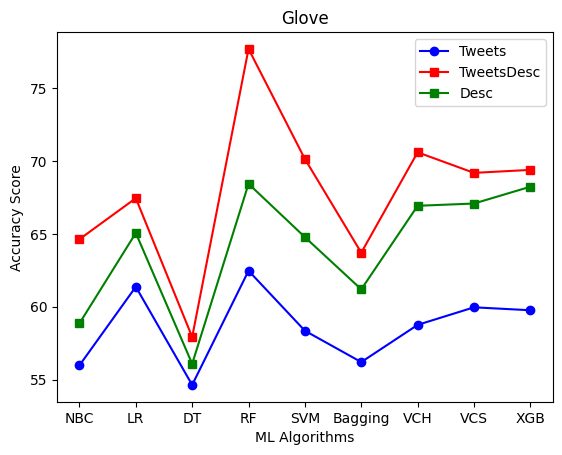

In [105]:
import matplotlib.pyplot as plt
import numpy as np
l1=np.array(l)
m1=np.array(m)
n1=np.array(n)
names = ["NBC","LR","DT","RF","SVM","Bagging","VCH","VCS","XGB"]
plt.plot(l1,label="Tweets",marker='o',color='blue')
plt.xticks(np.arange(len(names)), names)
plt.plot(m1,label="TweetsDesc",marker='s',color='red')
plt.plot(n1,label="Desc",marker='s',color='green')
plt.xlabel("ML Algorithms")
plt.ylabel("Accuracy Score")
plt.title("Glove")
plt.legend()
plt.show()